In [10]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-11-04 13:38:02,120: Credentials are already in use. The existing account in the session will be replaced.


In [11]:
%matplotlib inline

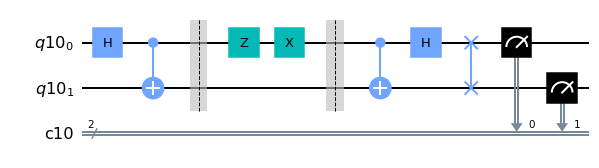

In [25]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.barrier()
message = "11"


if message[0] == "1":
    qc.z(qr[0])
if message[1] == "1":
    qc.x(qr[0])
qc.barrier()
qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.swap(qr[0],qr[1])
qc.measure(qr,cr)
display(qc.draw('mpl'))

{'11': 1024}


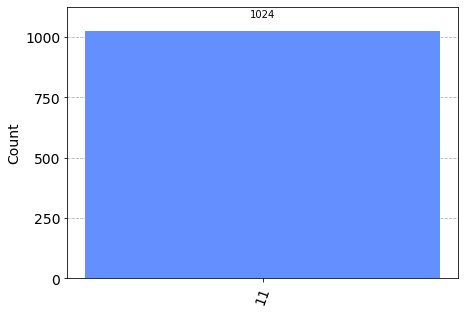

In [26]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)